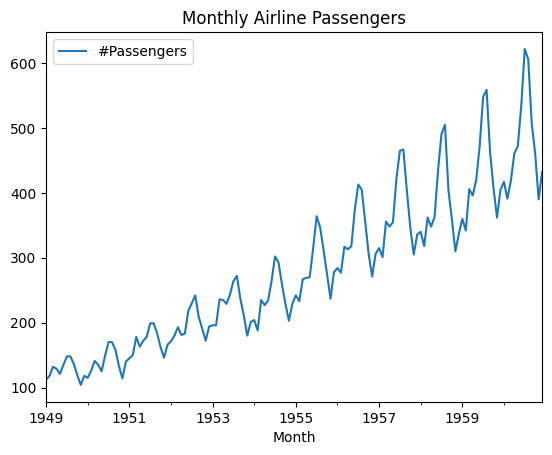

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

df.plot()
plt.title('Monthly Airline Passengers')
plt.show()


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Read the AirPassengers dataset
airline = pd.read_csv('AirPassengers.csv', index_col ='Month', parse_dates = True)
# Show first 10 rows of the data
airline.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


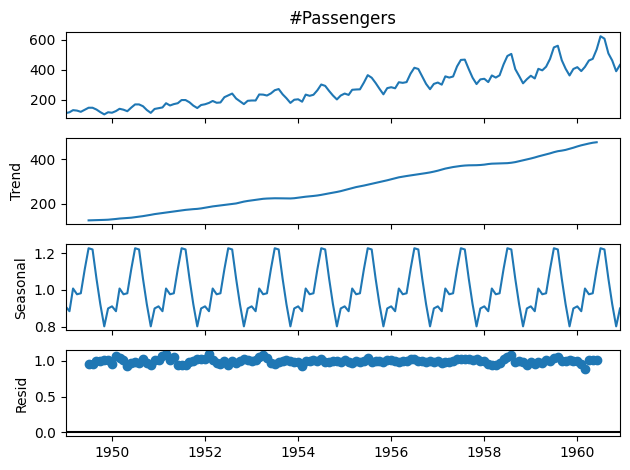

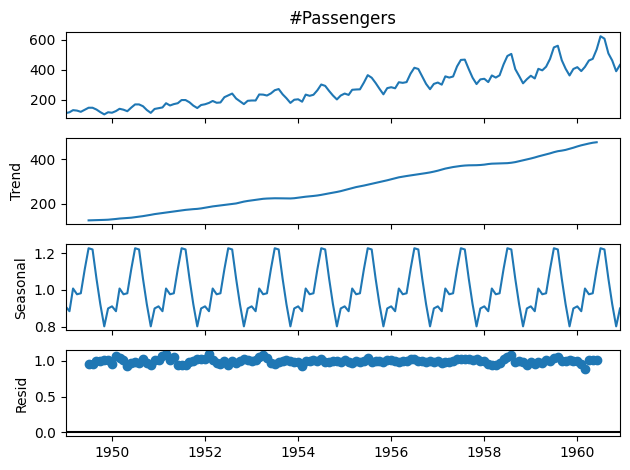

In [3]:
# ETS Decomposition
ets = seasonal_decompose(airline['#Passengers'], model ='multiplicative')
ets.plot()

In [9]:
from pmdarima import auto_arima
# Import the library
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(airline['#Passengers'], start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12,
                            start_P = 0, seasonal = True,
                            d = None, D = 1, trace = True,
                            error_action ='ignore', # we don't want to know if an order does not work
                            suppress_warnings = True, # we don't want convergence warnings
                            stepwise = True) # set to stepwise
# To print the summarykd
stepwise_fit.summary()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject